<a href="https://colab.research.google.com/github/TAUforPython/wavelets/blob/main/example%20DWT%20discrete%20wavelet%20transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import seaborn as sns

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Создание сигнала для анализа
def create_signal_example():
    """Создание примера сигнала из двух синусоид"""
    # Параметры
    sampling_rate = 1000  # частота дискретизации (Гц)
    duration = 2.0        # длительность сигнала (сек)
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Создание сигнала: сумма двух синусоид
    frequency1 = 5   # 5 Гц
    frequency2 = 50  # 50 Гц
    signal = np.sin(2 * np.pi * frequency1 * t) + 0.5 * np.sin(2 * np.pi * frequency2 * t)

    return t, signal, sampling_rate

# Вычисление DFT
def compute_dft(signal):
    """Вычисление дискретного преобразования Фурье"""
    dft_result = fft(signal)
    return dft_result


# Fourier transform example

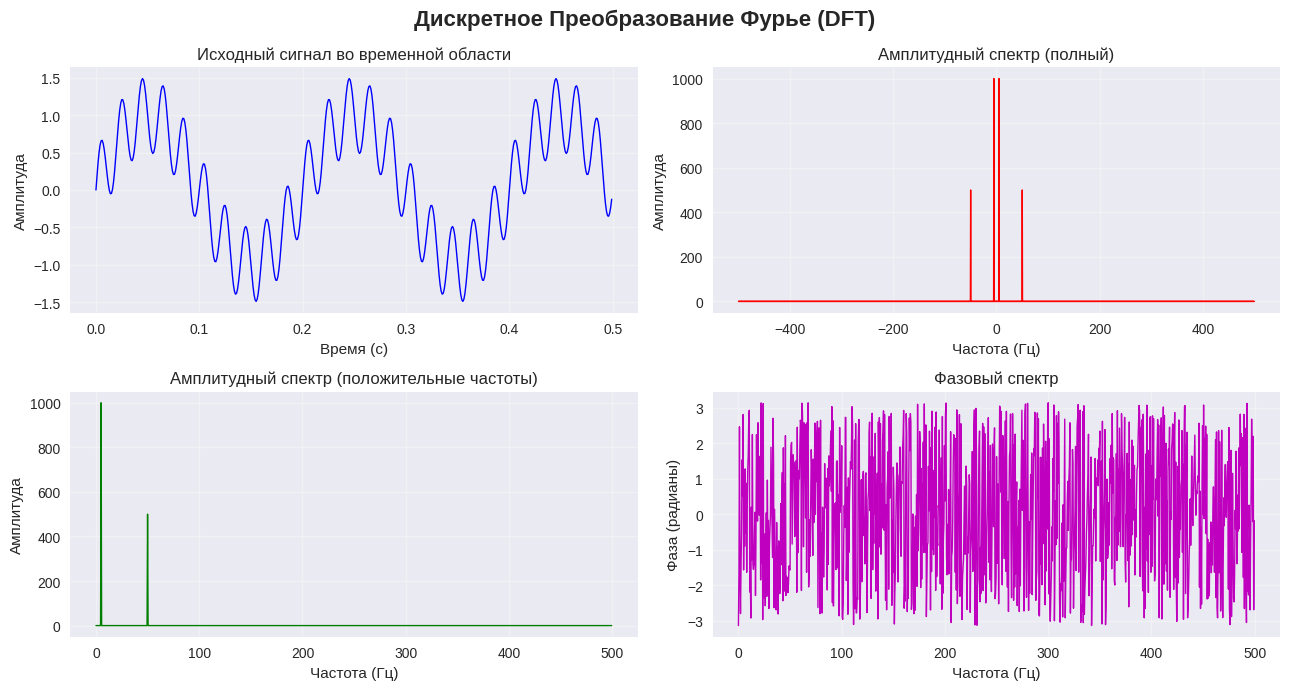

ИНФОРМАЦИЯ О СИГНАЛЕ:
Частота дискретизации: 1000 Гц
Длительность сигнала: 2.0 секунд
Количество отсчетов: 2000
Разрешение по частоте: 0.5 Гц


In [ ]:

# Создание сигнала
t, signal, fs = create_signal_example()

# Вычисление DFT
dft_result = compute_dft(signal)
frequencies = fftfreq(len(signal), 1/fs)

# Создание графиков
fig, axes = plt.subplots(2, 2, figsize=(13, 7))
fig.suptitle('Дискретное Преобразование Фурье (DFT)', fontsize=16, fontweight='bold')

# 1. Исходный сигнал во временной области
axes[0, 0].plot(t[:500], signal[:500], 'b-', linewidth=1)
axes[0, 0].set_xlabel('Время (с)')
axes[0, 0].set_ylabel('Амплитуда')
axes[0, 0].set_title('Исходный сигнал во временной области')
axes[0, 0].grid(True, alpha=0.3)

# 2. Амплитудный спектр (полный)
magnitude_spectrum = np.abs(dft_result)
axes[0, 1].plot(frequencies, magnitude_spectrum, 'r-', linewidth=1)
axes[0, 1].set_xlabel('Частота (Гц)')
axes[0, 1].set_ylabel('Амплитуда')
axes[0, 1].set_title('Амплитудный спектр (полный)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Амплитудный спектр (только положительные частоты)
positive_freq_idx = frequencies >= 0
axes[1, 0].plot(frequencies[positive_freq_idx], magnitude_spectrum[positive_freq_idx], 'g-', linewidth=1)
axes[1, 0].set_xlabel('Частота (Гц)')
axes[1, 0].set_ylabel('Амплитуда')
axes[1, 0].set_title('Амплитудный спектр (положительные частоты)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Фазовый спектр
phase_spectrum = np.angle(dft_result)
axes[1, 1].plot(frequencies[positive_freq_idx], phase_spectrum[positive_freq_idx], 'm-', linewidth=1)
axes[1, 1].set_xlabel('Частота (Гц)')
axes[1, 1].set_ylabel('Фаза (радианы)')
axes[1, 1].set_title('Фазовый спектр')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод информации о сигнале
print("ИНФОРМАЦИЯ О СИГНАЛЕ:")
print("=" * 50)
print(f"Частота дискретизации: {fs} Гц")
print(f"Длительность сигнала: {len(signal)/fs} секунд")
print(f"Количество отсчетов: {len(signal)}")
print(f"Разрешение по частоте: {fs/len(signal)} Гц")

# Дискретное вейвлет преобразование DWT

https://discourse.julialang.org/t/plots-with-a-secondary-non-linear-axis-scale/56661
https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [ ]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

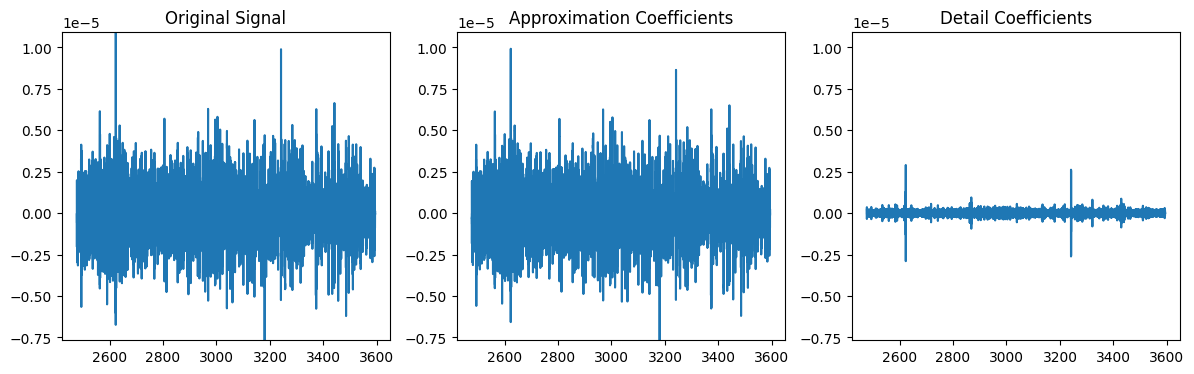

In [ ]:
# Generate the signal
#t = np.linspace(0, 1, 100, endpoint=False)
#signal = np.cos(2.0 * np.pi * 7 * t) + np.sin(2.0 * np.pi * 13 * t)

# Apply DWT
coeffs = pywt.dwt(y, 'db1')
cA, cD = coeffs

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.ylim(min(y),max(y))
plt.plot(t, y)
plt.title("Original Signal")

plt.subplot(1, 3, 2)
plt.ylim(min(y),max(y))
plt.plot(t, pywt.upcoef('a', cA, 'db1',take = len(t)))
plt.title("Approximation Coefficients")

plt.subplot(1, 3, 3)
plt.plot(t, pywt.upcoef('d', cD, 'db1', take = len(t)))
plt.ylim(min(y),max(y))
plt.title("Detail Coefficients")

plt.tight_layout()
plt.show()

In [ ]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [ ]:
waveletname = 'db4'
dwt_coeffs = pywt.wavedec(y, waveletname, level=5)

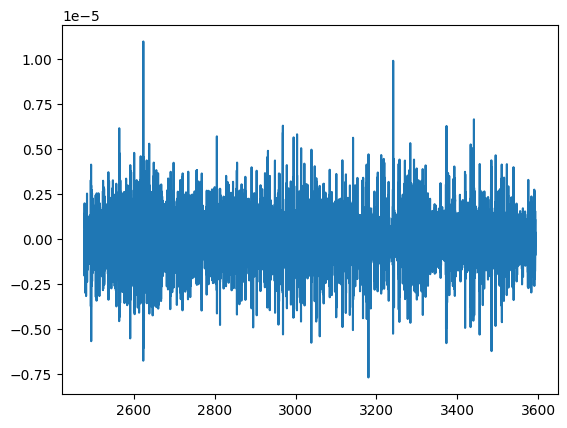

In [ ]:
y_idwt = pywt.waverec(dwt_coeffs, wavelet = waveletname, mode = 'zero')
plt.plot(t,y_idwt)

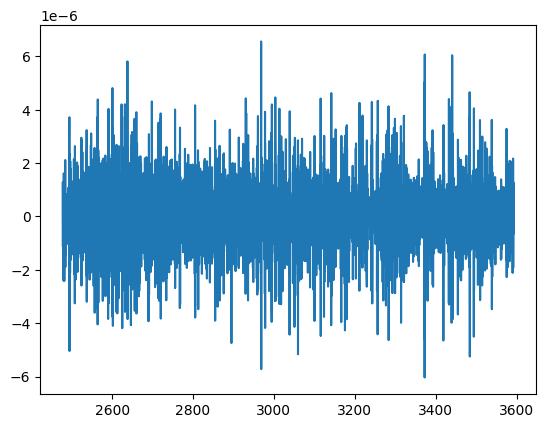

In [ ]:
# восстановление сигнала с помощью обратного дискретного вейвлет преобразования
plt.plot(t, pywt.upcoef('a', dwt_coeffs[0][:], waveletname, level = 5, take = len(y)))

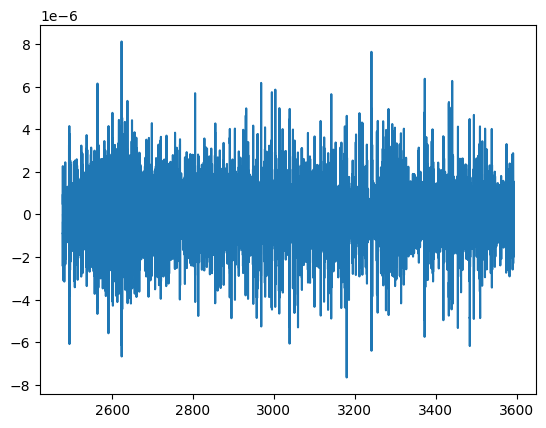

In [ ]:
y_5level_idwt = \
  pywt.upcoef('a', dwt_coeffs[0][:], waveletname, level = 5, take = len(y))\
+ pywt.upcoef('d', dwt_coeffs[1][:], waveletname, level = 5, take = len(y))\
+ pywt.upcoef('d', dwt_coeffs[2][:], waveletname, level = 4, take = len(y))\
+ pywt.upcoef('d', dwt_coeffs[3][:], waveletname, level = 3, take = len(y))\
+ pywt.upcoef('d', dwt_coeffs[4][:], waveletname, level = 2, take = len(y))\
+ pywt.upcoef('d', dwt_coeffs[5][:], waveletname, level = 1, take = len(y))
plt.plot(t,y_5level_idwt)

<Figure size 640x480 with 0 Axes>

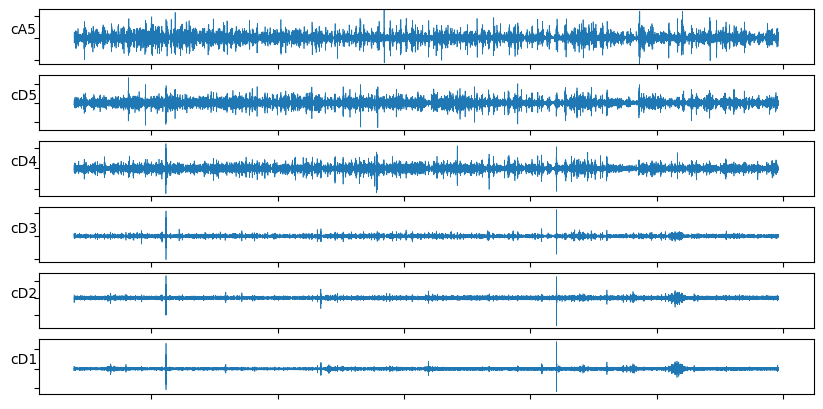

In [ ]:
plot_as_level = 5
fig = plt.figure()
fig, ax = plt.subplots(plot_as_level + 1,1,figsize=(10,5))
y_cA = pywt.upcoef('a', dwt_coeffs[0][:], waveletname, level = plot_as_level, take = len(y))
ax[0].set_ylim(min(y_cA), max(y_cA))
ax[0].set_ylabel('cA%i'%plot_as_level, rotation = 0)
ax[0].set_yticklabels([])
ax[0].plot(t, y_cA,linewidth = 0.5)


for i in range(1,plot_as_level + 1):
    #ax = fig.add_subplot(8, 1, i)
    #ax[i].set_ylim(min(y_cA), max(y_cA))
    #ax[i-1].set_yticklabels(np.arange(-25, 25, step=25))
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel('cD%i'%(plot_as_level + 1 - i), rotation = 0)
    y_cD = pywt.upcoef('d', dwt_coeffs[i][:], waveletname, level = plot_as_level + 1 - i , take = len(y))
    ax[i].plot(t, y_cD,linewidth = 0.5)

<Figure size 640x480 with 0 Axes>

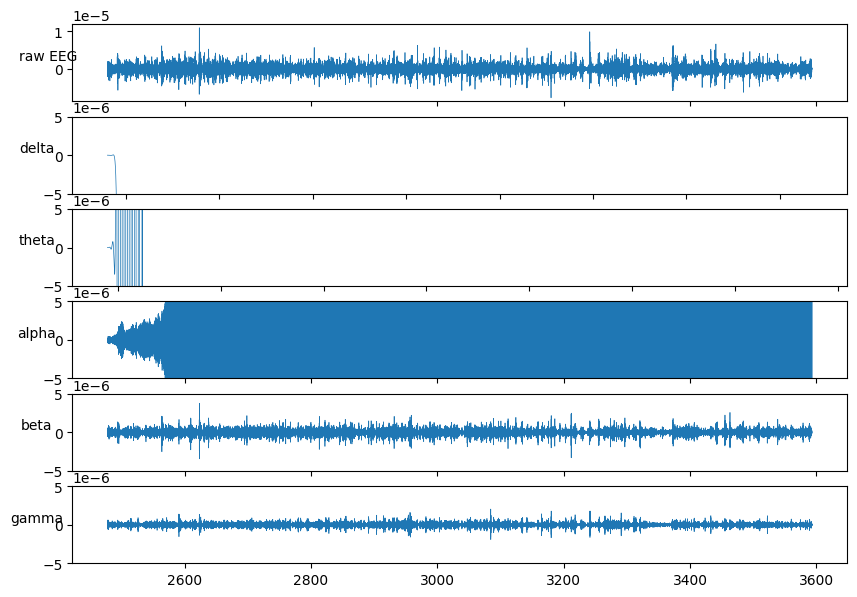

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(6,1,figsize=(10,7))
#ax[0].set_ylim(-0.000005, 0.000005)
ax[0].plot(t, y,linewidth = 0.5)
ax[0].set_ylabel('raw EEG', rotation = 0)

for i in range(1,6):
    ax[i].set_ylim(-0.000005, 0.000005)
    #ax[i-1].set_yticklabels(np.arange(-25, 25, step=25))
    #ax[i-1].set_yticklabels([])
    ax[i-1].set_xticklabels([])
    ax[i].set_ylabel(band_names[i-1], rotation = 0)
    filtered_signals = np.apply_along_axis(butter_bandpass_filter, axis=0, arr=y, lowcut=band_value[i-1], highcut=band_value[i], fs=fs)
    ax[i].plot(t, filtered_signals,linewidth = 0.5)

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Text(0.5, 1.0, 'ошибка восстановления сигнала')

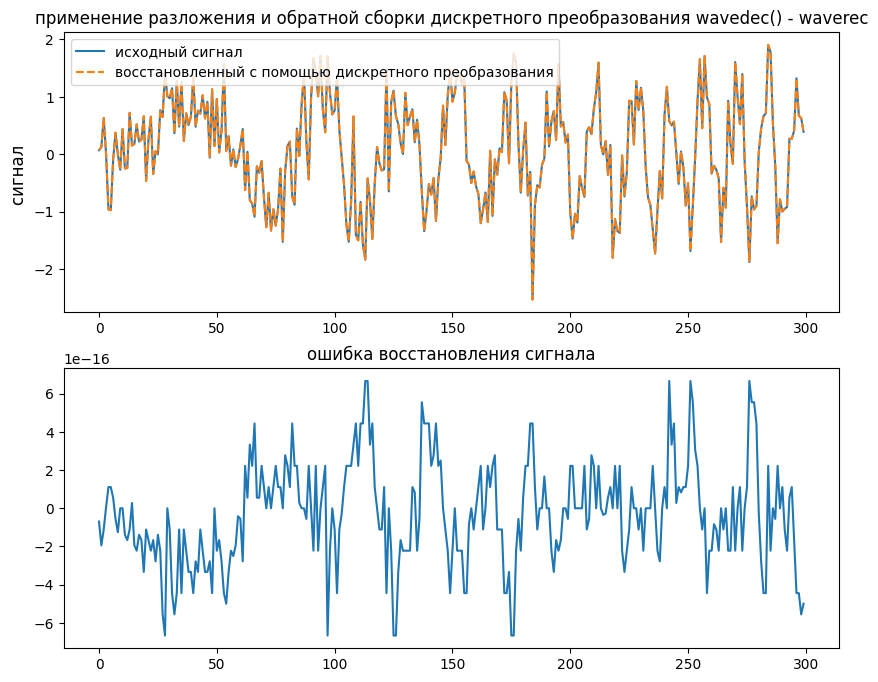

In [ ]:
num = 300
x = np.linspace(0, 1, num=num)
signal = np.sin(25 * np.pi * x**2) + np.random.normal(0, scale=0.5, size=len(x))

coeffs = pywt.wavedec(signal, 'db4', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db4')

plt.figure(figsize=(10, 8))

ax1 = plt.subplot(211)
plt.plot(signal[:num], label='исходный сигнал')
plt.plot(reconstructed_signal[:num], label='восстановленный с помощью дискретного преобразования', linestyle='--')
ax1.legend(loc='upper left')
ax1.set_title('применение разложения и обратной сборки дискретного преобразования wavedec() - waverec')

plt.ylabel('сигнал ', fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(signal[:num] - reconstructed_signal[:num])
ax2.set_title("ошибка восстановления сигнала")

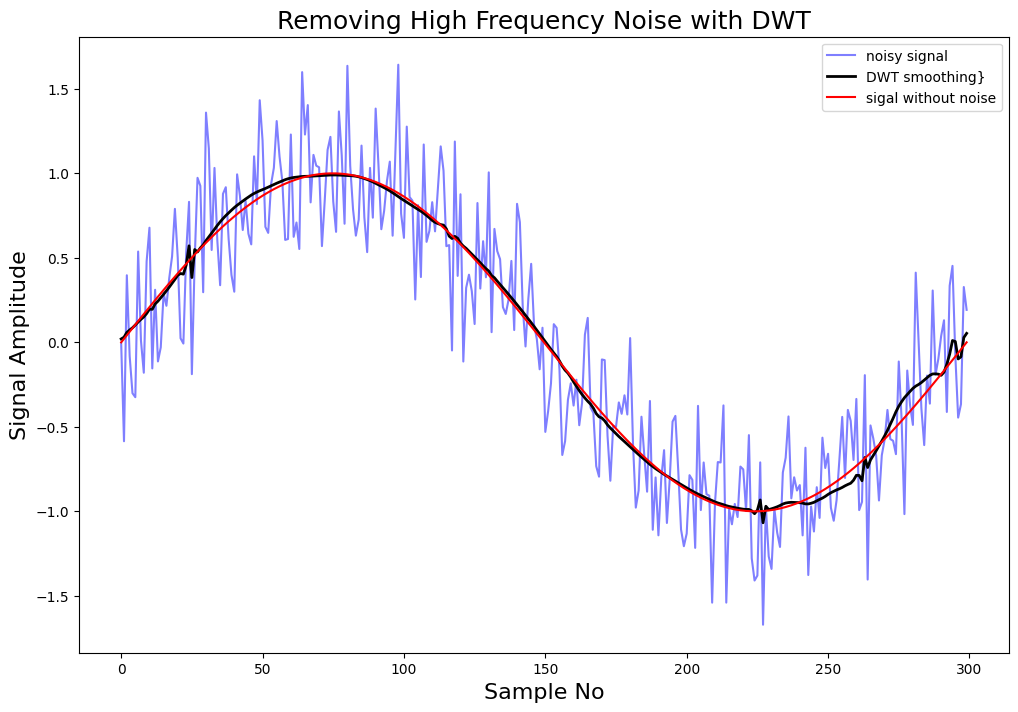

In [ ]:
import random
num = 300
x = np.linspace(0, 1, num=num)
signal = np.sin(2*np.pi * x) + np.random.normal(0, scale=0.3, size=len(x))
signal_ideal = np.sin(2*np.pi * x)

def lowpassfilter(signal, thresh = 0.7, wavelet = "db4"):
    thresh = thresh * np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='noisy signal')
rec = lowpassfilter(signal, 0.4)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.plot(signal_ideal, 'r', label='sigal without noise')
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

In [ ]:
from pylab import *
from scipy import *
import scipy.io.wavfile as wavfile

In [ ]:
from scipy.fft import fft, fftfreq

yfft = fft(y)
xf = fftfreq(N, T/N)[:N//2]
amp_f = np.abs(yfft[0:N//2])
fi_f = np.unwrap(np.angle(yfft[:N//2]))

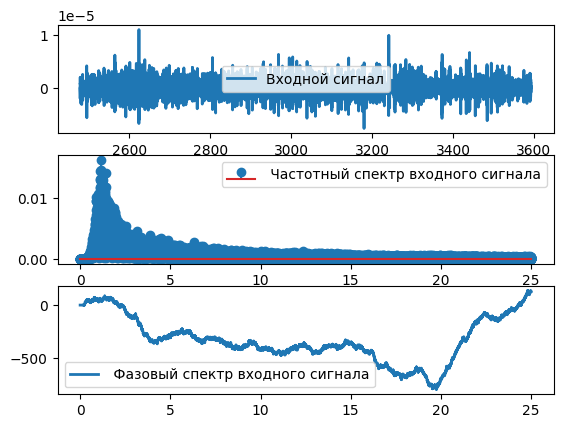

In [ ]:
plt.subplot(3, 1, 1)
st = 'Входной сигнал'
plt.plot(t,y,linewidth=2, label=st)
plt.legend(loc='center')

#строим не весь спектр, а только до конкретного значения часторы Hz
Hz = np.where(xf > 25)[0][0]

plt.subplot(3, 1, 2)
st = ' Частотный спектр входного сигнала'
#plt.plot(xf[0:Hz], amp_f[0:Hz], linewidth=2, label=st)
plt.stem(xf[0:Hz], amp_f[0:Hz],label=st)
legend(loc='best')

plt.subplot(3, 1, 3)
st = ' Фазовый спектр входного сигнала'
#pX=np.unwrap(np.angle(yfft))
plt.plot(xf[0:Hz], fi_f[0:Hz], linewidth=2, label=st)
plt.legend(loc='best')

plt.show()

In [ ]:
def scalogram(data,t):
    bottom = 0
    vmin = min(map(lambda x: min(abs(x)), data))
    vmax = max(map(lambda x: max(abs(x)), data))
    gca().set_autoscale_on(False)
    for row in range(0, len(data)):
        scale = 2.0 ** (row - len(data))
        imshow(
            array([abs(data[row])]),
            cmap = 'jet',
            aspect = 'auto',
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [t[0], t[-1], bottom, bottom + scale])
        bottom += scale

<Figure size 640x480 with 0 Axes>

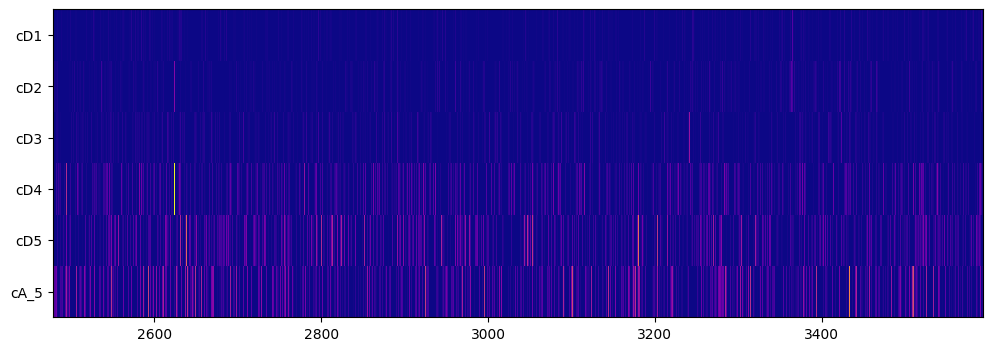

In [ ]:
#waveletname = 'db4'
d_coeffs = pywt.wavedec(y, waveletname, level=5)

plt.figure()
plt.figure(figsize=(12, 4))
for i, ci in enumerate(d_coeffs):
    #plt.imshow(ci.reshape(1, -1), extent=[t[0], t[-1], i + 0.5, i + 1.5], cmap='jet', aspect='auto', interpolation='nearest')
    plt.imshow(ci.reshape(1, -1), extent=[t[0], t[-1], i + 0.5, i + 1.5],
               cmap='plasma', aspect='auto', interpolation='nearest',
               vmax=abs(ci).max(), vmin=-abs(coef).min())

#im1 = ax1.imshow(abs(coef), cmap='jet', aspect='auto', interpolation='bilinear',
#                 extent=[t[0], t[-1], max(scales), min(scales)],
#                 vmax=abs(coef).max(), vmin=-abs(coef).min())

plt.ylim(0.5, len(d_coeffs) + 0.5) # set the y-lim to include the six horizontal images
# optionally relabel the y-axis (the given labeling is 1,2,3,...)
plt.yticks(range(1, len(d_coeffs) + 1), ['cA_5', 'cD5', 'cD4', 'cD3', 'cD2', 'cD1'])

plt.show()